<a href="https://colab.research.google.com/github/bulentsoykan/Agent-Based-Models/blob/main/Conway_s_Game_of_Life.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conway’s Game of Life

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
N=100
ALIVE = 255
DEAD = 0

In [3]:
grid = np.random.choice(255, N*N).reshape(N, N)
grid

array([[219, 116, 129, ...,  26,  83, 197],
       [ 78, 121, 123, ...,  95, 131, 235],
       [ 50,  56, 207, ..., 146,  64, 229],
       ...,
       [110,  26, 238, ..., 238, 203,  98],
       [ 22, 159,  80, ...,  57, 241,  32],
       [ 57, 207, 198, ..., 242,  48, 222]])

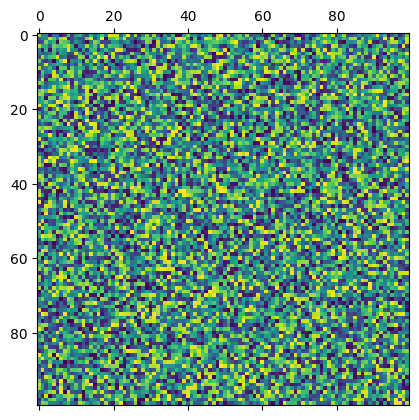

In [4]:
plt.matshow(grid)

In [6]:
for i in range(N):
    for j in range(N):
        if grid[i,j]>127:
            grid[i,j]=ALIVE
        else:
            grid[i,j]=DEAD

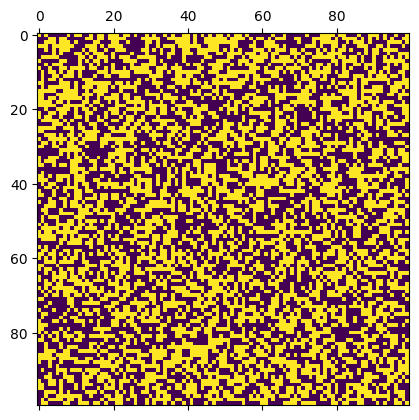

In [7]:
plt.matshow(grid)

In [11]:
def update_grid(data):
    global grid
    new_grid=grid.copy() #to make a copy to put the new new grid
    for i in range(N):
        for j in range(N):
            #get the total number of neighbours
            #assuming wrapping of the board around the edges
            neighbours=((grid[i,(j+1)%N]+grid[i,(j-1)%N]+
                        grid[(i+1)%N,j]+grid[(i-1)%N,j]+
                        grid[(i+1)%N,(j+1)%N]+grid[(i-1)%N,(j+1)%N]+
                        grid[(i+1)%N,(j-1)%N]+grid[(i-1)%N,(j-1)%N]))/255
            #conditions of Conway's Game of Life
            if grid[i,j]==ALIVE:
                if neighbours<2:
                    new_grid[i,j]=DEAD
                elif (neighbours==2 or neighbours==3):
                    new_grid[i,j]=ALIVE
                elif neighbours>3:
                    new_grid[i,j]=DEAD

            elif grid[i,j]==DEAD:
                if neighbours==3:
                    new_grid[i,j]=ALIVE

    updated_grid.set_data(new_grid)
    grid=new_grid
    return [updated_grid]

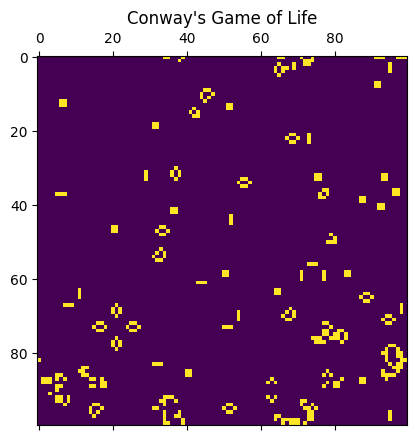

In [20]:
fig,ax=plt.subplots()
plt.title("Conway's Game of Life")
updated_grid=ax.matshow(grid)
anime=animation.FuncAnimation(fig,update_grid,interval=100,save_count=50)
anime.save("animation.mp4")